## Deep learning for computer vision
### Example 1: Using a ConvNet to classify MNIST digits
- （1）Introduction to convolutional neural networks (ConvNets)
- （2）How to combine the following layers for image classification: Conv2D， MaxPooling2D， Dense
- （3）Using the MNIST dataset which is already prepared and loaded using Keras

### Example 2: Training a ConvNet from Scratch on a Small Dataset
- (1) Building a ConvNet with Raw Image Data
    - Designing a ConvNet architecture using: Conv2D， MaxPooling2D， Dense
    - Working with raw image data by creating a proper directory structure: training set, validation set, test set
- (2) Using data augmentation to reduce overfitting
- (3) Using a pre-trained ConvNet for our small dataset
- (4) Fine-tuning a pre-trained ConvNet for our small dataset

<font color="green">
    
### Example 1: Use convnet to classify MNIST digits.
    
- The fundamental difference between a densely-connected layer and a convolution layer is this: dense layers learn global patterns in their input feature space, while convolution layers learn local patterns.

This key characteristic gives convnets two interesting properties:

- The patterns they learn are translation-invariant, i.e. after learning a certain pattern in the bottom right corner of a picture, a convnet is able to recognize it anywhere, e.g. in the top left corner. A densely-connected network would have to learn the pattern anew if it appeared at a new location. This makes convnets very data-efficient when processing images (since the visual world is fundamentally translation-invariant): they need less training samples to learn representations that have generalization power.
- They can learn spatial hierarchies of patterns. A first convolution layer will learn small local patterns such as edges, but a second convolution layer will learn larger patterns made of the features of the first layers. And so on. This allows convnets to efficiently learn increasingly complex and abstract visual concepts (since the visual world is fundamentally spatially hierarchical).
</font>

In [1]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# reshape the input data
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

from keras import models
from keras import layers
network = models.Sequential()
network.add(layers.Input(shape=(train_images.shape[1],train_images.shape[1],1)))  # Specify the input shape
network.add(layers.Conv2D(32, (3, 3), activation='relu'))
network.add(layers.MaxPooling2D((2, 2)))
network.add(layers.Conv2D(64, (3, 3), activation='relu'))
network.add(layers.MaxPooling2D((2, 2)))
network.add(layers.Conv2D(64, (3, 3), activation='relu'))
network.add(layers.Flatten())
network.add(layers.Dense(64, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# one-hot encoding for categorical data
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
 
# train the model
network.fit(train_images, train_labels, epochs=5, batch_size=128,verbose=0)

# get the accuracy on test data
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

C:\Users\li\anaconda3\envs\LLM\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9915 - loss: 0.0260
test_acc: 0.9915000200271606


<font color="orangered">
    
### Example 2: Training a convnet from scratch on a small dataset

- Having "few" samples can mean anywhere from a few hundreds to a few tens of thousands of images. As a practical example, we will focus on classifying images as "dogs" or "cats", in a dataset containing 4000 pictures of cats and dogs (2000 cats, 2000 dogs). We will use 2000 pictures for training, 1000 for validation, and finally 1000 for testing.
- You can download the original dataset at: www.kaggle.com/c/dogs-vs-cats/data 
- Create following folders: a training set with 1000 samples of each class, a validation set with 500 samples of each class, and finally a test set with 500 samples of each class.
```
cats_and_dogs_small  
│
└───train
│      cats
│       └───1000 cat images  
│      dogs
│       └───1000 dog images
└───test
│      cats
│        └───500 cat images
│      dogs
│        └───500 dog images
└───validation
       cats
        └───500 cat images
       dogs
        └───500 dog images
```

</font>

In [9]:
import os, shutil
# The path to the directory where the original dataset was uncompressed
original_dataset_dir = r'F:\learning\Deep Learning\ch05\dogs-vs-cats\train'

# The directory where we will store our smaller dataset
base_dir = r'F:\learning\Deep Learning\ch05\cats_and_dogs_small'
os.mkdir(base_dir)

# Directories for our training, validation and test splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)
# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# Directory with our validation cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
# Directory with our validation dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

# Copy first 1000 cat images to train_cats_dir
fnames = [f'cat.{i}.jpg' for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)   
# Copy first 1000 dog images to train_cats_dir
fnames = [f'dog.{i}.jpg' for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
       
# Copy next 500 cat images to validation_cats_dir
fnames = [f'cat.{i}.jpg' for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)   
# Copy next 500 dog images to validation_cats_dir
fnames = [f'dog.{i}.jpg' for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 cat images to test_cats_dir
fnames = [f'cat.{i}.jpg' for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)   
# Copy next 500 dog images to validation_cats_dir
fnames = [f'dog.{i}.jpg' for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
print('total training cat images:', len(os.listdir(train_cats_dir))) 
print('total training dog images:', len(os.listdir(train_dogs_dir)))

from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Input(shape=(150, 150 , 3)))  # Specify the input shape
model.add(layers.Conv2D(32, (3, 3), activation='relu',))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

from keras import optimizers
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(learning_rate=1e-4), metrics=['acc'])

import tensorflow as tf
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=50, verbose=0)
pa = os.path.join(base_dir,'cats_and_dogs_small_1.keras')
model.save(pa) # Save the model

total training cat images: 1000
total training dog images: 1000
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


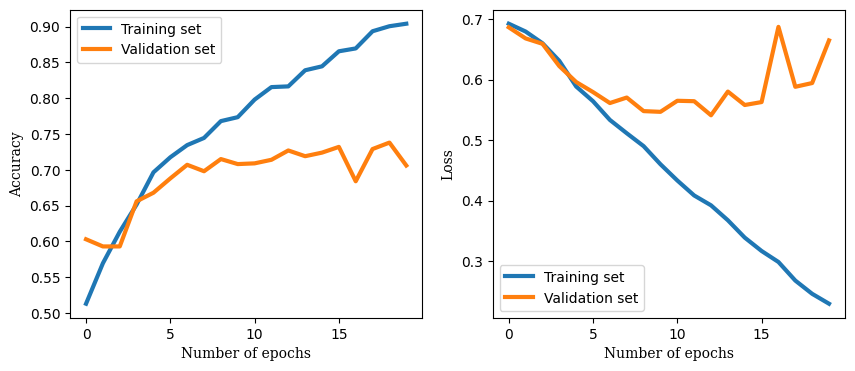

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(range(20),history.history['acc'],linewidth=3, label='Training set')
plt.plot(range(20),history.history['val_acc'],linewidth=3, label='Validation set')
plt.xlabel("Number of epochs",fontdict= {'family':'serif','size':10})
plt.ylabel("Accuracy",fontdict= {'family':'serif','size':10})
plt.legend()
plt.subplot(1,2,2)
plt.plot(range(20),history.history['loss'],linewidth=3, label='Training set')
plt.plot(range(20),history.history['val_loss'],linewidth=3, label='Validation set')
plt.xlabel("Number of epochs",fontdict= {'family':'serif','size':10})
plt.ylabel("Loss",fontdict= {'family':'serif','size':10})
plt.legend()
plt.show()

<font color="orangered">
    
- These plots are characteristic of overfitting. Our training accuracy increases linearly over time, while our validation accuracy stalls at 70-72%. Our validation loss reaches its minimum after only five epochs then stalls, while the training loss keeps decreasing linearly until it reaches nearly 0.  

- Because we only have relatively few training samples (2000), overfitting is going to be our number one concern. A number of techniques can help mitigate overfitting, such as dropout and weight decay (L2 regularization). We are now going to introduce a new one, specific to computer vision, and used almost universally when processing images with deep learning models: **data augmentation**

  
</font>

<font color="orangered">
    
### Data augmentation
</font>

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


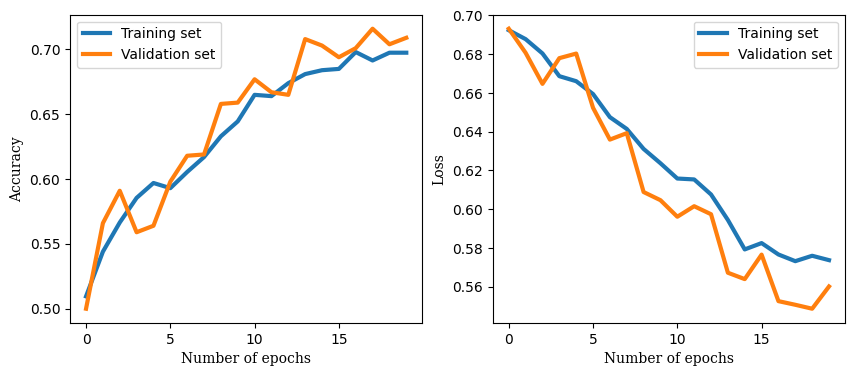

In [10]:
import os, shutil
def data_preparation():
    # The path to the directory where the original dataset was uncompressed
    original_dataset_dir = r'F:\learning\Deep Learning\ch05\dogs-vs-cats\train'
    
    # The directory where we will store our smaller dataset
    base_dir = r'F:\learning\Deep Learning\ch05\cats_and_dogs_small'
    os.mkdir(base_dir)
    
    # Directories for our training, validation and test splits
    train_dir = os.path.join(base_dir, 'train')
    os.mkdir(train_dir)
    validation_dir = os.path.join(base_dir, 'validation')
    os.mkdir(validation_dir)
    test_dir = os.path.join(base_dir, 'test')
    os.mkdir(test_dir)
    
    # Directory with our training cat pictures
    train_cats_dir = os.path.join(train_dir, 'cats')
    os.mkdir(train_cats_dir)
    # Directory with our training dog pictures
    train_dogs_dir = os.path.join(train_dir, 'dogs')
    os.mkdir(train_dogs_dir)
    
    # Directory with our validation cat pictures
    validation_cats_dir = os.path.join(validation_dir, 'cats')
    os.mkdir(validation_cats_dir)
    # Directory with our validation dog pictures
    validation_dogs_dir = os.path.join(validation_dir, 'dogs')
    os.mkdir(validation_dogs_dir)
    
    # Directory with our validation cat pictures
    test_cats_dir = os.path.join(test_dir, 'cats')
    os.mkdir(test_cats_dir)
    # Directory with our validation dog pictures
    test_dogs_dir = os.path.join(test_dir, 'dogs')
    os.mkdir(test_dogs_dir)
    
    # Copy first 1000 cat images to train_cats_dir
    fnames = [f'cat.{i}.jpg' for i in range(1000)]
    for fname in fnames:
        src = os.path.join(original_dataset_dir, fname)
        dst = os.path.join(train_cats_dir, fname)
        shutil.copyfile(src, dst)   
    # Copy first 1000 dog images to train_cats_dir
    fnames = [f'dog.{i}.jpg' for i in range(1000)]
    for fname in fnames:
        src = os.path.join(original_dataset_dir, fname)
        dst = os.path.join(train_dogs_dir, fname)
        shutil.copyfile(src, dst)
           
    # Copy next 500 cat images to validation_cats_dir
    fnames = [f'cat.{i}.jpg' for i in range(1000,1500)]
    for fname in fnames:
        src = os.path.join(original_dataset_dir, fname)
        dst = os.path.join(validation_cats_dir, fname)
        shutil.copyfile(src, dst)   
    # Copy next 500 dog images to validation_cats_dir
    fnames = [f'dog.{i}.jpg' for i in range(1000,1500)]
    for fname in fnames:
        src = os.path.join(original_dataset_dir, fname)
        dst = os.path.join(validation_dogs_dir, fname)
        shutil.copyfile(src, dst)
        
    # Copy next 500 cat images to test_cats_dir
    fnames = [f'cat.{i}.jpg' for i in range(1500,2000)]
    for fname in fnames:
        src = os.path.join(original_dataset_dir, fname)
        dst = os.path.join(test_cats_dir, fname)
        shutil.copyfile(src, dst)   
    # Copy next 500 dog images to validation_cats_dir
    fnames = [f'dog.{i}.jpg' for i in range(1500,2000)]
    for fname in fnames:
        src = os.path.join(original_dataset_dir, fname)
        dst = os.path.join(test_dogs_dir, fname)
        shutil.copyfile(src, dst)
        
    print('total training cat images:', len(os.listdir(train_cats_dir))) 
    print('total training dog images:', len(os.listdir(train_dogs_dir)))
#data_preparation()

from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Input(shape=(150, 150 , 3)))  # Specify the input shape
model.add(layers.Conv2D(32, (3, 3), activation='relu',))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

from keras import optimizers
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(learning_rate=1e-4), metrics=['acc'])

import tensorflow as tf
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                                rotation_range=40,
                                                                width_shift_range=0.2,
                                                                height_shift_range=0.2,
                                                                shear_range=0.2,
                                                                zoom_range=0.2,
                                                                horizontal_flip=True)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255) ## Note that the validation data should not be augmented!

train_dir=r"F:\learning\Deep Learning\ch05\cats_and_dogs_small\train"
validation_dir=r"F:\learning\Deep Learning\ch05\cats_and_dogs_small\validation"
base=base_dir = r'F:\learning\Deep Learning\ch05\cats_and_dogs_small'
train_generator = train_datagen.flow_from_directory(
        train_dir, # This is the target directory
        target_size=(150, 150), # All images will be resized to 150x150
        batch_size=20,
        class_mode='binary') # Since we use binary_crossentropy loss, we need binary labels
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=50, verbose=0)
pa = os.path.join(base_dir,'cats_and_dogs_small_2.keras')
model.save(pa) # Save the model

import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(range(20),history.history['acc'],linewidth=3, label='Training set')
plt.plot(range(20),history.history['val_acc'],linewidth=3, label='Validation set')
plt.xlabel("Number of epochs",fontdict= {'family':'serif','size':10})
plt.ylabel("Accuracy",fontdict= {'family':'serif','size':10})
plt.legend()
plt.subplot(1,2,2)
plt.plot(range(20),history.history['loss'],linewidth=3, label='Training set')
plt.plot(range(20),history.history['val_loss'],linewidth=3, label='Validation set')
plt.xlabel("Number of epochs",fontdict= {'family':'serif','size':10})
plt.ylabel("Loss",fontdict= {'family':'serif','size':10})
plt.legend()
plt.show()

<font color="orangered">  
In the codes above, 2 things have changed: 
    
- (1) add data augmentation via: *train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)*         
- (2) add dropout
 
Thanks to data augmentation and dropout, we are no longer overfitting: the training curves are rather closely tracking the validation curves. 
</font>

In [ ]:
train_data=[]
train_target=[]
import tensorflow as tf
for i in range(1000):
    for j in ['cat','dog']:
        img_path=f"F:/learning/Deep Learning/ch05/dogs-vs-cats/train/{j}.{i}.jpg"
        img = tf.keras.preprocessing.image.load_img(img_path,target_size=(400,400))
        img_array = tf.keras.preprocessing.image.img_to_array(img)
        img_array = img_array / 255.0
        train_data.append(img_array)
        if j=='cat':
            train_target.append(0)
        else:
            train_target.append(1)

vali_data=[]
vali_target=[]
import tensorflow as tf
for i in range(500):
    for j in ['cat','dog']:
        img_path=f"F:/learning/Deep Learning/ch05/dogs-vs-cats/train/{j}.{i+1000}.jpg"
        img = tf.keras.preprocessing.image.load_img(img_path, target_size=(400,400))
        img_array = tf.keras.preprocessing.image.img_to_array(img)
        img_array = img_array / 255.0
        vali_data.append(img_array)
        if j=='cat':
            vali_target.append(0)
        else:
            vali_target.append(1)

test_data=[]
test_target=[]
import tensorflow as tf
for i in range(500):
    for j in ['cat','dog']:
        img_path=f"F:/learning/Deep Learning/ch05/dogs-vs-cats/train/{j}.{i+1500}.jpg"
        img = tf.keras.preprocessing.image.load_img(img_path, target_size=(400,400))
        img_array = tf.keras.preprocessing.image.img_to_array(img)
        img_array = img_array / 255.0
        test_data.append(img_array)
        if j=='cat':
            test_target.append(0)
        else:
            test_target.append(1)

import numpy as np
train_data=np.array(train_data)
train_targe=np.array(train_target)

vali_data=np.array(vali_data)
vali_targe=np.array(vali_target)

test_data=np.array(test_data)
test_targe=np.array(test_target)

from keras import models
from keras import layers
network = models.Sequential()
network.add(layers.Input(shape=(train_data.shape[1],train_data.shape[2],3)))  # Specify the input shape
network.add(layers.Conv2D(16, (3, 3), activation='relu'))
network.add(layers.MaxPooling2D((2, 2)))
network.add(layers.Conv2D(16, (3, 3), activation='relu'))
network.add(layers.MaxPooling2D((2, 2)))
network.add(layers.Conv2D(16, (3, 3), activation='relu'))

network.add(layers.Flatten())
network.add(layers.Dense(32, activation='relu'))
network.add(layers.Dense(1, activation='sigmoid'))
network.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])

# train the model
network.fit(train_data, train_targe, epochs=20, batch_size=16, validation_data=(vali_data, vali_targe))

# get the accuracy on test data
test_loss, test_acc = network.evaluate(test_data, test_targe)
print('test_acc:', test_acc)

import matplotlib.pyplot as plt
def plot_loss(mae,loss):
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.plot(len(mae),mae,linewidth=3)
    plt.xlabel("Number of epochs",fontdict= {'family':'serif','size':10})
    plt.ylabel("Accuracy",fontdict= {'family':'serif','size':10})
    plt.subplot(1,2,2)
    plt.plot(len(mae),loss,linewidth=3)
    plt.xlabel("Number of epochs",fontdict= {'family':'serif','size':10})
    plt.ylabel("Loss",fontdict= {'family':'serif','size':10})
    plt.show()

plot_loss(test_acc,test_loss)

<font color="orangered">
Above is my original way of preparing the data: I loaded all the training and test data from disk into Python and then built the deep learning model. This approach was extremely slow and nearly exhausted my computer's memory, so it is not recommended. Using data generator to load data in bacthes is a much better and more efficient solution.
</font>

<font color="orangered">
    
### Using a pre-trained convnet

- Here, we will run the convolutional base over our dataset, recording its output to a Numpy array on disk, then using this data as input to a standalone densely-connected classifier. This solution is very fast and cheap to run, because it only requires running the convolutional base once for every input image, and the convolutional base is by far the most expensive part of the pipeline. However, for the exact same reason, this technique would not allow us to leverage data augmentation at all
</font>

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

None
Found 2000 images belonging to 2 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 999ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 752ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 755ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 785ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 762ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 778ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 798ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 803ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 761ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 769ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 754ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 818ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 761ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 779ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 748ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 842ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 813ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 793ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 775ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 809ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 772ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 800ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 837ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 818ms/step
1/1 ━━━━━━━━━━━━━

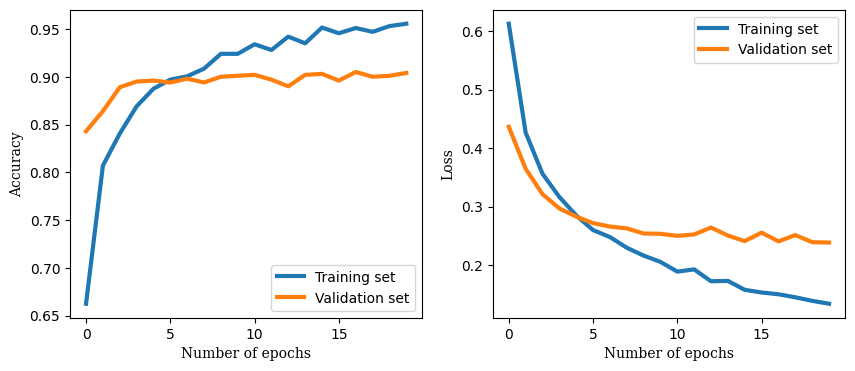

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.8820 - loss: 0.2514
test_acc: 0.8820000290870667


In [12]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))
print(conv_base.summary())
import os
import numpy as np
base_dir = r'F:\learning\Deep Learning\ch05\cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

import tensorflow as tf
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop, we must `break` after every image has been seen once.
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

# Build the dense layer
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Input(shape=(4 * 4 * 512,)))  # Specify the input shape
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(train_features, train_labels,
                    epochs=20, batch_size=20,
                    validation_data=(validation_features, validation_labels))

import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
n=len(history.history['acc'])
plt.plot(range(n),history.history['acc'],linewidth=3, label='Training set')
plt.plot(range(n),history.history['val_acc'],linewidth=3, label='Validation set')
plt.xlabel("Number of epochs",fontdict= {'family':'serif','size':10})
plt.ylabel("Accuracy",fontdict= {'family':'serif','size':10})
plt.legend()
plt.subplot(1,2,2)
plt.plot(range(n),history.history['loss'],linewidth=3, label='Training set')
plt.plot(range(n),history.history['val_loss'],linewidth=3, label='Validation set')
plt.xlabel("Number of epochs",fontdict= {'family':'serif','size':10})
plt.ylabel("Loss",fontdict= {'family':'serif','size':10})
plt.legend()
plt.show()

test_loss, test_acc = model.evaluate(test_features,test_labels)
print('test_acc:', test_acc)

<font color="orangered">
    
- We reach a validation accuracy of about 90%, much better than what we could achieve in the previous section with our small model trained from scratch. However, our plots also indicate that we are overfitting almost from the start—despite using dropout with a fairly large rate. This is because this technique does not leverage data augmentation, which is essential to preventing overfitting with small image datasets
</font>

<font color="orangered">
Here, we will extend the model we have (conv_base) by adding layers on top, and running conv_base Dense the whole thing end-to-end on the input data. This allows us to use data augmentation, because every input image is going through the convolutional base every time it is seen by the model. However, for this same reason, this technique is far more expensive than the first one. (This code needs GPU, so I did not run but the code is correct)
</font>

In [ ]:
import os
from keras.applications import VGG16
from keras import models
from keras import layers
import tensorflow as tf
from keras import optimizers
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
conv_base.trainable = False
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(learning_rate=1e-4), metrics=['acc'])

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                                rotation_range=40,
                                                                width_shift_range=0.2,
                                                                height_shift_range=0.2,
                                                                shear_range=0.2,
                                                                zoom_range=0.2,
                                                                horizontal_flip=True)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255) ## Note that the validation data should not be augmented!

train_dir=r"F:\learning\Deep Learning\ch05\cats_and_dogs_small\train"
validation_dir=r"F:\learning\Deep Learning\ch05\cats_and_dogs_small\validation"
base_dir = r'F:\learning\Deep Learning\ch05\cats_and_dogs_small'
train_generator = train_datagen.flow_from_directory(
        train_dir, # This is the target directory
        target_size=(150, 150), # All images will be resized to 150x150
        batch_size=20,
        class_mode='binary') # Since we use binary_crossentropy loss, we need binary labels
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=50, verbose=0)
pa = os.path.join(base_dir,'cats_and_dogs_small_3.keras')
model.save(pa) # Save the model

import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(range(20),history.history['acc'],linewidth=3, label='Training set')
plt.plot(range(20),history.history['val_acc'],linewidth=3, label='Validation set')
plt.xlabel("Number of epochs",fontdict= {'family':'serif','size':10})
plt.ylabel("Accuracy",fontdict= {'family':'serif','size':10})
plt.legend()
plt.subplot(1,2,2)
plt.plot(range(20),history.history['loss'],linewidth=3, label='Training set')
plt.plot(range(20),history.history['val_loss'],linewidth=3, label='Validation set')
plt.xlabel("Number of epochs",fontdict= {'family':'serif','size':10})
plt.ylabel("Loss",fontdict= {'family':'serif','size':10})
plt.legend()
plt.show()

<font color="orangered">
    
### Fine-tuning

Another widely used technique for model reuse, complementary to feature extraction, is fine-tuning. Fine-tuning consists in unfreezing a few of the top layers of a frozen model base used for feature extraction, and jointly training both the newly added part of the model (in our case, the fully-connected classifier) and these top layers. This is called "fine-tuning" because it slightly adjusts the more abstract representations of the model
being reused, in order to make them more relevant for the problem at hand.

</font>

In [ ]:
import os
from keras.applications import VGG16
from keras import models
from keras import layers
import tensorflow as tf
from keras import optimizers
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
conv_base.trainable = False
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(learning_rate=1e-4), metrics=['acc'])

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                                rotation_range=40,
                                                                width_shift_range=0.2,
                                                                height_shift_range=0.2,
                                                                shear_range=0.2,
                                                                zoom_range=0.2,
                                                                horizontal_flip=True)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255) ## Note that the validation data should not be augmented!

train_dir=r"F:\learning\Deep Learning\ch05\cats_and_dogs_small\train"
validation_dir=r"F:\learning\Deep Learning\ch05\cats_and_dogs_small\validation"
base_dir = r'F:\learning\Deep Learning\ch05\cats_and_dogs_small'
train_generator = train_datagen.flow_from_directory( 
        train_dir, # This is the target directory
        target_size=(150, 150), # All images will be resized to 150x150
        batch_size=20,
        class_mode='binary') # Since we use binary_crossentropy loss, we need binary labels
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=50, verbose=0)

# Then fine tuningon the base of the pretrained model
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(learning_rate=1e-4), metrics=['acc'])

history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=50, verbose=0)

pa = os.path.join(base_dir,'cats_and_dogs_small_4.keras')
model.save(pa) # Save the model